## Importing Required Packages 

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df=pd.read_csv("Height-Weight.csv")

In [3]:
df.head(n=10)

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0
5,M,76,170,76.0,165.0
6,M,76,167,77.0,165.0
7,M,69,186,73.0,180.0
8,M,71,178,71.0,175.0
9,M,65,171,64.0,170.0


In [4]:
df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [ ]:
df.drop(labels='sex',axis=1)

In [5]:
df1=df[['height','weight','sex']]

In [6]:
df1.head()

,height,weight,sex
0,182,77,M
1,161,58,F
2,161,53,F
3,177,68,M
4,157,59,F


In [7]:
df1.shape

(199, 3)

In [8]:
df1.size

597

In [9]:
df1.height.head(n=10)

0    182
1    161
2    161
3    177
4    157
5    170
6    167
7    186
8    178
9    171
Name: height, dtype: int64

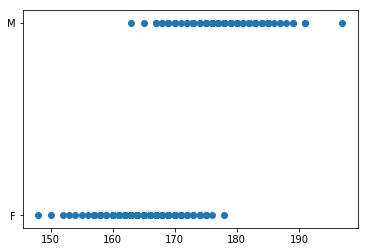

In [10]:
plt.scatter(df1.height,df1.sex)

In [11]:
df1.dtypes

height     int64
weight     int64
sex       object
dtype: object

In [12]:
df_new = df1.select_dtypes(exclude=['int64', 'float64'])
df_new1 = df1.select_dtypes(include=['int64', 'float64'])
df_encoded = df_new.apply(LabelEncoder().fit_transform)
df1 = df_new1.join(df_encoded )
df1.dtypes

height    int64
weight    int64
sex       int64
dtype: object

In [13]:
df1.sex.head()

0    1
1    0
2    0
3    1
4    0
Name: sex, dtype: int64

## Regression on Whole data

In [14]:
reg=LinearRegression()
reg.fit(df1[['height','sex']],df1[['weight']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
df1.drop(labels='weight',axis=1)

,height,sex
0,182,1
1,161,0
2,161,0
3,177,1
4,157,0
5,170,1
6,167,1
7,186,1
8,178,1
9,171,1


In [19]:
reg=LinearRegression()
reg.fit(df1.drop(labels='weight',axis=1),df1[['weight']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
pred=reg.predict([[170,1]])
pred

array([[69.21995466]])

In [24]:
reg.intercept_

array([-75.72158221])

## Model Summary using Statsmodel Package

In [22]:
## Model Summary using Statsmodel Package

model1=sm.OLS(df1[['weight']],df1[['height','sex']])
result=model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6533.
Date:                Sat, 23 Feb 2019   Prob (F-statistic):          8.40e-181
Time:                        11:15:23   Log-Likelihood:                -698.69
No. Observations:                 199   AIC:                             1401.
Df Residuals:                     197   BIC:                             1408.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.3465      0.005     73.933      0.000       0.337       0.356
sex           13.9873      1.204     11.618      0.000      11.613      16.362
==============================================================================
Omnibus:                       11.222   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.664
Skew:                           0.518   Prob(JB):                      0.00293
Kurtosis:                       3.578   Cond. No.                         356.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Divide the data into Training and Testing sets

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df1[['height','sex']],df1[['weight']],test_size=0.2) 

In [41]:
X_train.head()

,height,sex
186,169,0
173,168,1
190,173,1
188,158,0
14,166,0


## Train the Regression Model on Train Data

In [42]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
pred=reg.predict(X_test)
pred

array([[54.56359403],
       [80.78177396],
       [73.22954473],
       [71.55127157],
       [56.24186719],
       [52.88532087],
       [54.56359403],
       [57.08100377],
       [66.51645208],
       [79.94263738],
       [75.74695447],
       [57.92014036],
       [57.92014036],
       [57.92014036],
       [48.68963796],
       [51.20704771],
       [57.08100377],
       [47.85050138],
       [63.15990575],
       [50.36791112],
       [58.75927694],
       [57.08100377],
       [61.27668668],
       [54.56359403],
       [56.24186719],
       [69.03386182],
       [55.40273061],
       [59.59841352],
       [65.47236959],
       [72.39040815],
       [68.19472524],
       [56.24186719],
       [50.36791112],
       [91.69054952],
       [76.58609105],
       [55.40273061],
       [60.4375501 ],
       [60.4375501 ],
       [75.74695447],
       [53.72445745]])

## Predicting Results for Test set

In [34]:
reg.intercept_

array([-72.6076918])

In [31]:
# regression coefficients 
print('Coefficients: \n', reg.coef_) 
print('Intercept: \n',reg.intercept_)

Coefficients: 
 [[0.78516342 8.41178136]]
Intercept: 
 [-72.6076918]


## Calculation of Mean Squared Error

In [47]:
mse=np.mean((y_test-pred)**2)
mse
rmse=mse**0.5
rmse

weight    6.596082
dtype: float64

In [ ]:
y_test.weight[175]

In [ ]:
pred[0]

In [35]:
sklearn.metrics.mean_squared_error(y_test,pred)

76.18693635384241

In [38]:
reg.predict([[170,1]]) # weight value prediction for height=170  

array([[69.28187154]])

## Model Summary using Statsmodel Package

In [44]:
model1=sm.OLS(y_train,X_train)
result=model1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     4993.
Date:                Sat, 23 Feb 2019   Prob (F-statistic):          7.79e-143
Time:                        11:34:23   Log-Likelihood:                -563.62
No. Observations:                 159   AIC:                             1131.
Df Residuals:                     157   BIC:                             1137.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
height         0.3473      0.006     62.379      0.000       0.336       0.358
sex           14.0887      1.391     10.130      0.000      11.342      16.836
==============================================================================
Omnibus:                       10.296   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.438
Skew:                           0.564   Prob(JB):                      0.00541
Kurtosis:                       3.552   Cond. No.                         357.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""